# Adam

Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum. Some key advantages of Adam optimization include the following:
- **Faster convergence:** By adapting the learning rate during training, Adam converges much more quickly than SGD.
- **Easy to implement:** Only requiring first-order gradients, Adam is straightforward to implement and combine with deep neural networks.
- **Robust algorithm:** Adam performs well across various model architectures.
- **Little memory requirements:** Adam requires storing just the first and second moments of the gradients, keeping memory needs low.
- **Wide community adoption:** Adam is used extensively by deep learning practitioners and has become a default, go-to optimizer.

For more information related to the mathematics behind the Adam optimizer, you can refer the article: [Adam — latest trends in deep learning optimization](https://towardsdatascience.com/the-math-behind-adam-optimizer-c41407efe59b).

## Import libraries

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# check version on pandas
print('Version of pandas:', pd.__version__)
print('Version of numpy:', np.__version__)

Version of pandas: 2.1.1
Version of numpy: 1.26.1


In [2]:
# creating the input array
X = np.array([[1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

# converting the input in matrix form
X = X.T
print('Input:\n', X)

# shape of input array
print('Shape:', X.shape)

Input:
 [[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]
Shape: (4, 3)


In [3]:
# creating the output array
y = np.array([[1], [1], [0]])

# output in matrix form
y = y.T

print('Actual output:\n', y)

# shape of output array
print('Shape:', y.shape)

Actual output:
 [[1 1 0]]
Shape: (1, 3)


In [4]:
# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# defining the hyperparameters of the model
lr = 0.01 # learning rate
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer
epochs = 10000 # number of epochs

# initializing weight
w_ih = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
w_ho = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))

# parameters for Adam
beta_1 = 0.9
beta_2 = 0.9
u_ih = 0
u_ho = 0
v_ih = 0
v_ho = 0

In [5]:
error_adam = []

for i in range(epochs):
    
    # Forward Propogation
    # hidden layer activations
    hidden_layer_input = np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)  
    
    # calculating the output
    output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
    output = sigmoid(output_layer_input)
    
    # Backward Propagation
    # calculating error
    error = np.square(y - output)/2
    error_wrt_output = -(y - output)
    
    output_wrt_Z2 = np.multiply(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    
    # rate of change of error w.r.t weight between output and hidden layer
    error_wrt_who = np.dot(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).T)
    
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1 * np.dot(Z2_wrt_h1, (error_wrt_output * output_wrt_Z2))).T)
    
    # weighted squared gradients
    u_ho = beta_1 * u_ho + (1-beta_1) * np.square(error_wrt_who)
    u_ih = beta_1 * u_ih + (1-beta_1) * np.square(error_wrt_wih)
    
    # weighted gradients
    v_ho = beta_2 * v_ho + (1-beta_2)*error_wrt_who
    v_ih = beta_2 * v_ih + (1-beta_2)*error_wrt_wih
    
    # updating the learning rate
    new_lr_o = lr / np.sqrt(u_ho.sum())
    new_lr_h = lr / np.sqrt(u_ih.sum())

    # updating the weights
    w_ho = w_ho - new_lr_o * v_ho
    w_ih = w_ih - new_lr_h * v_ih
    error_adam.append(np.average(error))

print(error_adam[:10])

[0.11643771541734908, 0.11631161064106434, 0.11613826731397718, 0.11593199328591249, 0.11570062835698088, 0.11544940780021408, 0.11518218057770498, 0.11490194256502599, 0.11461111518222333, 0.11431170853395378]


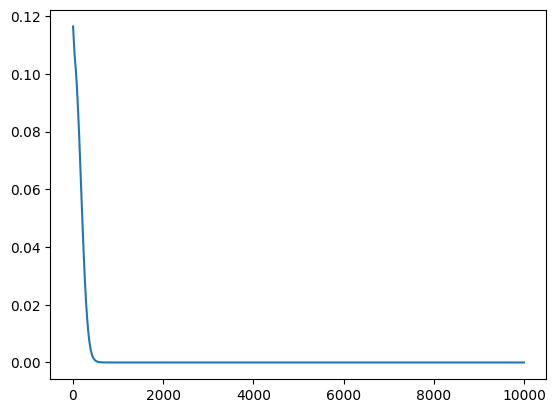

In [6]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_adam))